函式庫 宣告

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
# ↓ 使 圖表 可調
%matplotlib ipympl
# ↓ 使 生成圖表
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
def print_signal(X,signal,title,x,y):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(1,1,1)
    plt.title(title)
    plt.plot(X, signal)
    plt.xlabel(x,{'fontsize':10,'color':'red'})    # 設定 x 軸標籤
    plt.ylabel(y,{'fontsize':10,'color':'green'})  # 設定 y 軸標籤
    plt.show()

讀取資料

In [3]:
Data = pd.read_excel('交易資料集(2).xlsx')

In [4]:
# 資料前處理：重新組織數據
data = Data.groupby('INVOICE_NO')['ITEM_NO'].apply(lambda items: [str(item) for item in set(items)]).tolist()

In [5]:
te = TransactionEncoder();
te_array = te.fit(data).transform(data);
df = pd.DataFrame(te_array, columns=te.columns_);
def Association_rule(Type, support_threshold, confidence_threshold):
    start = time.time()
    if Type == 'Apriori':
        frequent_itemsets = apriori(df, min_support=support_threshold, use_colnames=True)
    elif Type == 'FPgrowth':
        frequent_itemsets = fpgrowth(df, min_support=support_threshold, use_colnames=True)

    # 檢查是否找到頻繁項目集
    if frequent_itemsets.empty:
        end = time.time()
        print("No frequent itemsets found for support = {} and confidence = {}".format(support_threshold, confidence_threshold))
        return pd.DataFrame(), end - start

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)
    end = time.time()
    return rules, end - start

In [6]:
execution_times, rule_counts,x = [], [], []
confidence = 0.01;
for Support in range(5,30):
    support = Support/10000
    x.append(support)
    print(f"Support: {support}, Confidence: {confidence}")
    rules, time_elapsed = Association_rule('Apriori', support, confidence)
    execution_times.append(time_elapsed)
    rule_counts.append(len(rules))

# print("Execution Times:", execution_times)
print("Number of Rules:", rule_counts)

Support: 0.0005, Confidence: 0.01
Support: 0.0006, Confidence: 0.01
Support: 0.0007, Confidence: 0.01
Support: 0.0008, Confidence: 0.01
Support: 0.0009, Confidence: 0.01
Support: 0.001, Confidence: 0.01
Support: 0.0011, Confidence: 0.01
Support: 0.0012, Confidence: 0.01
Support: 0.0013, Confidence: 0.01
Support: 0.0014, Confidence: 0.01
Support: 0.0015, Confidence: 0.01
Support: 0.0016, Confidence: 0.01
Support: 0.0017, Confidence: 0.01
Support: 0.0018, Confidence: 0.01
Support: 0.0019, Confidence: 0.01
Support: 0.002, Confidence: 0.01
Support: 0.0021, Confidence: 0.01
Support: 0.0022, Confidence: 0.01
Support: 0.0023, Confidence: 0.01
Support: 0.0024, Confidence: 0.01
Support: 0.0025, Confidence: 0.01
Support: 0.0026, Confidence: 0.01
Support: 0.0027, Confidence: 0.01
Support: 0.0028, Confidence: 0.01
Support: 0.0029, Confidence: 0.01
Number of Rules: [1618666, 19414, 2150, 582, 304, 142, 82, 64, 38, 26, 18, 10, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]


c:\Users\Ming Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


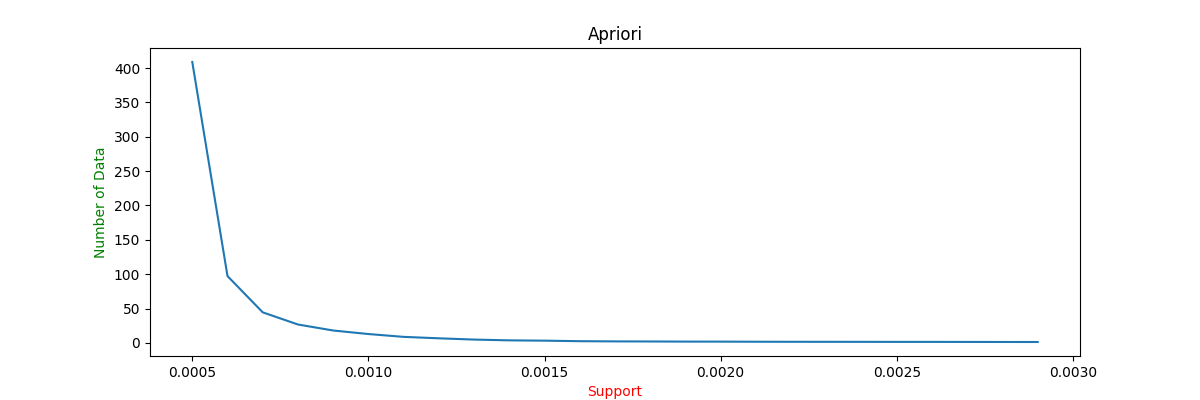

In [7]:
print_signal(x,execution_times,'Apriori','Support','Number of Data')
# print_signal(x,rule_counts,'Apriori')

FP-Growth 演算法

In [8]:
execution_times, rule_counts,x = [], [], []
confidence = 0.01;
for Support in range(5,30):
    support = Support/10000
    x.append(support)
    print(f"Support: {support}, Confidence: {confidence}")
    rules, time_elapsed = Association_rule('FPgrowth', support, confidence)
    execution_times.append(time_elapsed)
    rule_counts.append(len(rules))

# print("Execution Times:", execution_times)
print("Number of Rules:", rule_counts)

Support: 0.0005, Confidence: 0.01


Support: 0.0006, Confidence: 0.01
Support: 0.0007, Confidence: 0.01
Support: 0.0008, Confidence: 0.01
Support: 0.0009, Confidence: 0.01
Support: 0.001, Confidence: 0.01
Support: 0.0011, Confidence: 0.01
Support: 0.0012, Confidence: 0.01
Support: 0.0013, Confidence: 0.01
Support: 0.0014, Confidence: 0.01
Support: 0.0015, Confidence: 0.01
Support: 0.0016, Confidence: 0.01
Support: 0.0017, Confidence: 0.01
Support: 0.0018, Confidence: 0.01
Support: 0.0019, Confidence: 0.01
Support: 0.002, Confidence: 0.01
Support: 0.0021, Confidence: 0.01
Support: 0.0022, Confidence: 0.01
Support: 0.0023, Confidence: 0.01
Support: 0.0024, Confidence: 0.01
Support: 0.0025, Confidence: 0.01
Support: 0.0026, Confidence: 0.01
Support: 0.0027, Confidence: 0.01
Support: 0.0028, Confidence: 0.01
Support: 0.0029, Confidence: 0.01
Number of Rules: [1618666, 19414, 2150, 582, 304, 142, 82, 64, 38, 26, 18, 10, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]


c:\Users\Ming Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


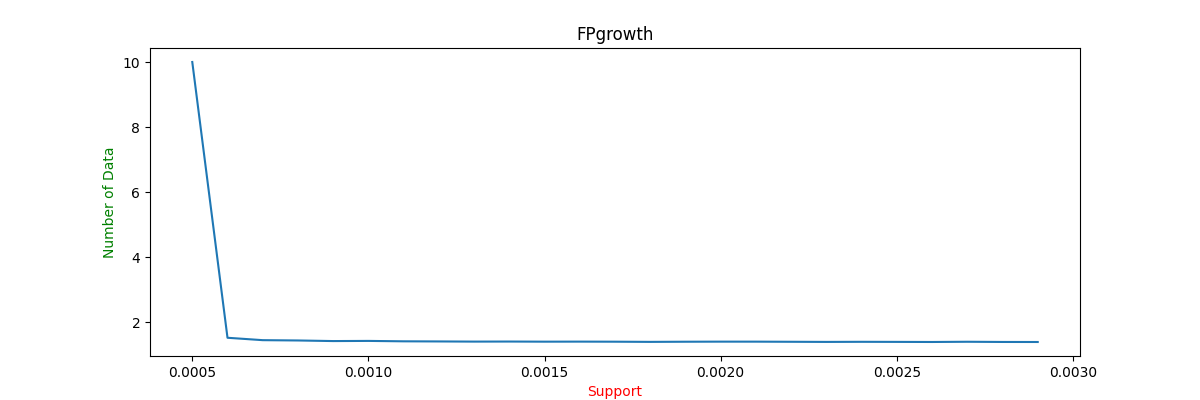

In [9]:
print_signal(x,execution_times,'FPgrowth','Support','Number of Data')
# print_signal(x,rule_counts,'FPgrowth')

In [10]:
execution_times, rule_counts,x = [], [], []
support = 0.0005;
for Conditence in range(1,1000):
    conditence = Conditence/1000
    x.append(conditence)
    print(f"Support: {support}, Confidence: {conditence}")
    rules, time_elapsed = Association_rule('Apriori', support, confidence)
    execution_times.append(time_elapsed)
    rule_counts.append(len(rules))

# print("Execution Times:", execution_times)
print("Number of Rules:", rule_counts)

Support: 0.0005, Confidence: 0.001
Support: 0.0005, Confidence: 0.002
Support: 0.0005, Confidence: 0.003
Support: 0.0005, Confidence: 0.004
Support: 0.0005, Confidence: 0.005
Support: 0.0005, Confidence: 0.006
Support: 0.0005, Confidence: 0.007
Support: 0.0005, Confidence: 0.008
Support: 0.0005, Confidence: 0.009
Support: 0.0005, Confidence: 0.01
Support: 0.0005, Confidence: 0.011
Support: 0.0005, Confidence: 0.012
Support: 0.0005, Confidence: 0.013
Support: 0.0005, Confidence: 0.014
Support: 0.0005, Confidence: 0.015
Support: 0.0005, Confidence: 0.016
Support: 0.0005, Confidence: 0.017
Support: 0.0005, Confidence: 0.018
Support: 0.0005, Confidence: 0.019
Support: 0.0005, Confidence: 0.02
Support: 0.0005, Confidence: 0.021
Support: 0.0005, Confidence: 0.022
Support: 0.0005, Confidence: 0.023
Support: 0.0005, Confidence: 0.024
Support: 0.0005, Confidence: 0.025
Support: 0.0005, Confidence: 0.026
Support: 0.0005, Confidence: 0.027
Support: 0.0005, Confidence: 0.028
Support: 0.0005, Confi

c:\Users\Ming Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


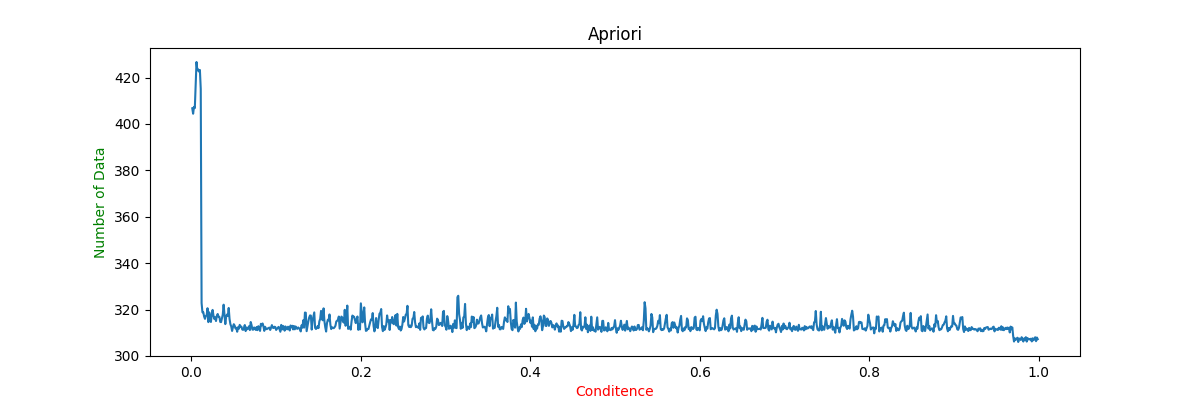

In [11]:
print_signal(x,execution_times,'Apriori','Conditence','Number of Data')

In [12]:
execution_times, rule_counts,x = [], [], []
support = 0.0005;
for Conditence in range(1,1000):
    conditence = Conditence/1000
    x.append(conditence)
    print(f"Support: {support}, Confidence: {conditence}")
    rules, time_elapsed = Association_rule('FPgrowth', support, confidence)
    execution_times.append(time_elapsed)
    rule_counts.append(len(rules))

# print("Execution Times:", execution_times)
print("Number of Rules:", rule_counts)

Support: 0.0005, Confidence: 0.001
Support: 0.0005, Confidence: 0.002
Support: 0.0005, Confidence: 0.003
Support: 0.0005, Confidence: 0.004
Support: 0.0005, Confidence: 0.005
Support: 0.0005, Confidence: 0.006
Support: 0.0005, Confidence: 0.007
Support: 0.0005, Confidence: 0.008
Support: 0.0005, Confidence: 0.009
Support: 0.0005, Confidence: 0.01
Support: 0.0005, Confidence: 0.011
Support: 0.0005, Confidence: 0.012
Support: 0.0005, Confidence: 0.013
Support: 0.0005, Confidence: 0.014
Support: 0.0005, Confidence: 0.015
Support: 0.0005, Confidence: 0.016
Support: 0.0005, Confidence: 0.017
Support: 0.0005, Confidence: 0.018
Support: 0.0005, Confidence: 0.019
Support: 0.0005, Confidence: 0.02
Support: 0.0005, Confidence: 0.021
Support: 0.0005, Confidence: 0.022
Support: 0.0005, Confidence: 0.023
Support: 0.0005, Confidence: 0.024
Support: 0.0005, Confidence: 0.025
Support: 0.0005, Confidence: 0.026
Support: 0.0005, Confidence: 0.027
Support: 0.0005, Confidence: 0.028
Support: 0.0005, Confi

c:\Users\Ming Hong\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\widget.py:503: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


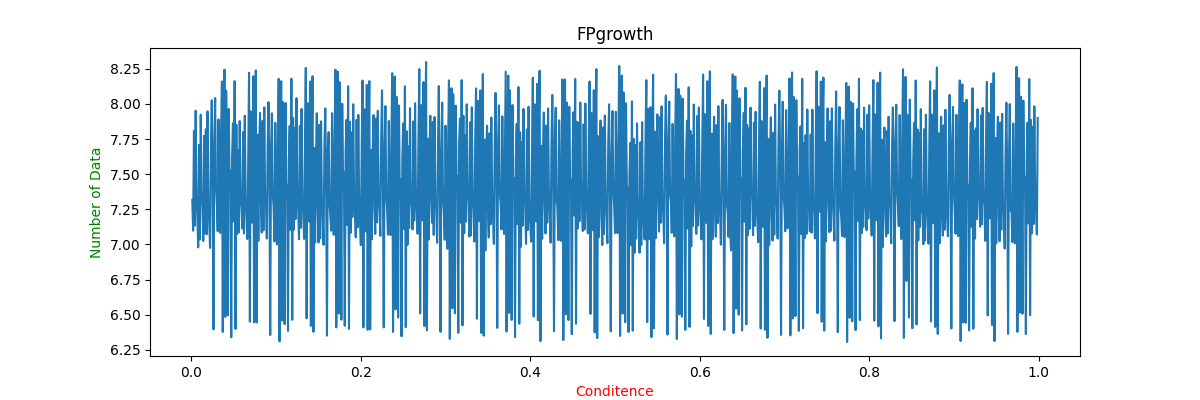

In [13]:
print_signal(x,execution_times,'FPgrowth','Conditence','Number of Data')